## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 31s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('C:/Users/shiva\Documents/MachineLearningProjects/Face_Recognition_Deep_Learning/Dataset/Train*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/shiva/Documents/MachineLearningProjects/Face_Recognition_Deep_Learning/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 200 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('C:/Users/shiva/Documents/MachineLearningProjects/Face_Recognition_Deep_Learning/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 56 images belonging to 2 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/50
7/7 [==============================] - 57s 8s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 47s 7s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 47s 7s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 47s 7s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 46s 7s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 48s 7s/step - loss: 7.8033 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 47s 7s/step - loss: 7.8033 - acc

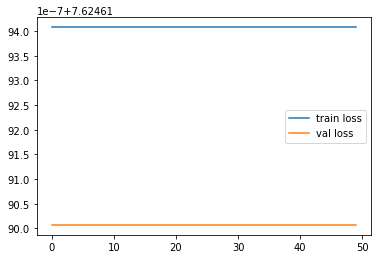

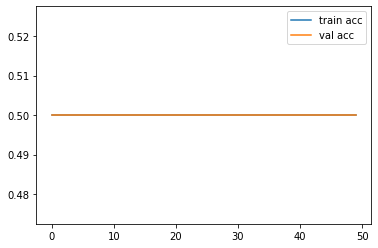

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [93]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [94]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [95]:
x.shape

(224, 224, 3)

In [96]:
x=x/255

In [97]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [98]:
model.predict(img_data)

array([[0.02122196, 0.49325418, 0.4855238 ]], dtype=float32)

In [100]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])